In [1]:
# importing essential libraries for data cleaning and EDA
import numpy as np
import pandas as pd

# for handling date time
import datetime as datetime

# stats and other libraries
import scipy.stats as stats

# plotting libraries
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

# for handling geographic data

# modeling libraries
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import FunctionTransformer, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn import svm, tree

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score


import xgboost as xgb
from xgboost import XGBClassifier

import seaborn as sns
import scipy.stats as stats
import string
import warnings
warnings.filterwarnings('ignore')

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE



sns.set_style('ticks')
pd.set_option('display.max_columns', None)

%matplotlib inline


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# pip install imblearn

In [3]:
merged = pd.read_csv('../data/merged_data.csv',index_col='Unnamed: 0')
# merged.head()

In [4]:
merged.Station.value_counts()

2    7208
1    3298
Name: Station, dtype: int64

In [5]:
merged.Cluster.value_counts()

5.0     437
8.0     377
1.0     216
0.0     207
6.0     194
11.0    189
10.0    169
4.0     147
7.0     138
Name: Cluster, dtype: int64

## Feature Engineering

In [6]:
species_dummies = pd.get_dummies(merged.Species, drop_first=False)

In [7]:
merged = pd.concat([merged, species_dummies], axis=1)

In [8]:
# Species MIR Plots:
mir = merged.groupby(['year','month','week','Species']).sum().reset_index()
mir['mir'] = mir['WnvPresent']/mir['NumMosquitos']*1000
mir.head()

year  month  week                 Species    Latitude    Longitude  \
0  2007      5    22           CULEX PIPIENS   41.731922   -87.677512   
1  2007      5    22  CULEX PIPIENS/RESTUANS  377.233204  -789.377994   
2  2007      5    22          CULEX RESTUANS  627.956984 -1315.348752   
3  2007      6    23           CULEX PIPIENS  209.137334  -438.523790   
4  2007      6    23  CULEX PIPIENS/RESTUANS  837.429620 -1754.322955   

   AddressAccuracy  NumMosquitos  WnvPresent  Station  Tmax  Tmin  Tavg  \
0                8             1           0        2    88    65    77   
1               70            10           0       14   792   565   681   
2              120            29           0       27  1320   960  1146   
3               41             6           0        9   316   251   284   
4              167            28           0       31  1269   984  1131   

   Depart  DewPoint  WetBulb  PrecipTotal  StnPressure  SeaLevel  ResultSpeed  \
0      13        59       66         0.00        29.44     30.09          5.8   
1     105       527      590         0.00       264.76    270.89         52.2   
2     186       882      987         0.00       441.45    451.41         87.0   
3     -41       236      259         1.50       145.74    148.91         30.0   
4    -169       949     1031         6.75       582.66    595.69        115.0   

   ResultDir  AvgSpeed    Tmax_wkly    Tmin_wkly    Tavg_wkly  Depart_wkly  \
0         16       7.4    79.142857    56.428571    68.000000     5.714286   
1        152      63.0   712.285714   507.857143   612.000000    51.428571   
2        246     108.3  1187.142857   846.428571  1020.000000    85.714286   
3         17      40.0   388.571429   303.571429   347.857143    27.142857   
4         78     157.5  1554.285714  1214.285714  1391.428571   108.571429   

   DewPoint_wkly  WetBulb_wkly  PrecipTotal_wkly  StnPressure_wkly  \
0      50.571429     58.571429          0.152857         29.404286   
1     455.142857    527.142857          1.375714        264.638571   
2     758.571429    878.571429          2.292857        441.064286   
3     293.571429    312.142857          0.757143        145.392857   
4    1174.285714   1248.571429          3.028571        581.571429   

   SeaLevel_wkly  ResultSpeed_wkly  ResultDir_wkly  AvgSpeed_wkly  \
0      30.125714          7.642857       16.571429       9.485714   
1     271.131429         68.785714      149.142857      85.371429   
2     451.885714        114.642857      248.571429     142.285714   
3     148.992857         34.642857       98.571429      41.642857   
4     595.971429        138.571429      394.285714     166.571429   

   Tmax_wkly_lag7  Tmin_wkly_lag7  Tavg_wkly_lag7  Depart_wkly_lag7  \
0       73.571429       46.714286       60.285714          0.142857   
1      662.142857      420.428571      542.571429          1.285714   
2     1103.571429      700.714286      904.285714          2.142857   
3      395.714286      282.142857      340.000000         28.571429   
4     1582.857143     1128.571429     1360.000000        114.285714   

   DewPoint_wkly_lag7  WetBulb_wkly_lag7  PrecipTotal_wkly_lag7  \
0           40.000000          49.714286               0.030000   
1          360.000000         447.428571               0.270000   
2          600.000000         745.714286               0.450000   
3          252.857143         292.857143               0.764286   
4         1011.428571        1171.428571               3.057143   

   StnPressure_wkly_lag7  SeaLevel_wkly_lag7  ResultSpeed_wkly_lag7  \
0              29.400000           30.122857               8.785714   
1             264.600000          271.105714              79.071429   
2             441.000000          451.842857             131.785714   
3             147.021429          150.628571              38.214286   
4             588.085714          602.514286             152.857143   

   ResultDir_wkly_lag7  AvgSpeed_wkly_lag7  Tmax_wkly_lag14  Tmi

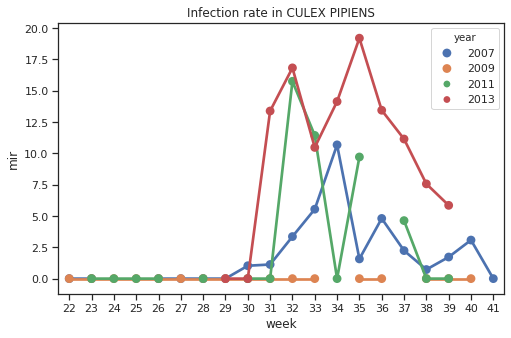

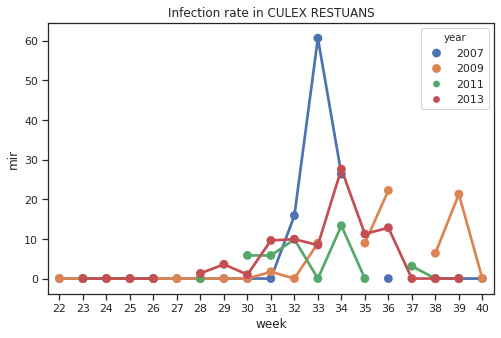

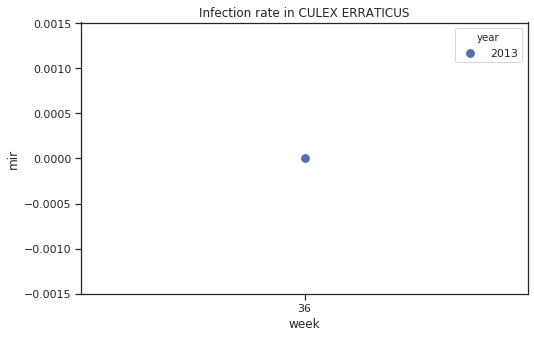

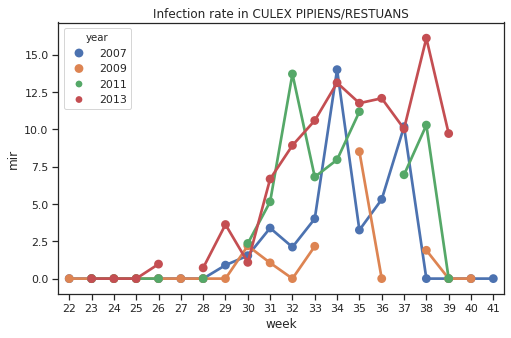

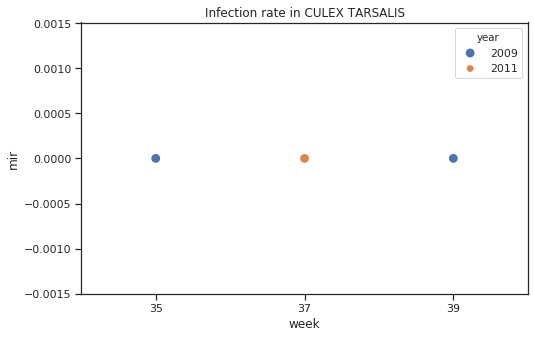

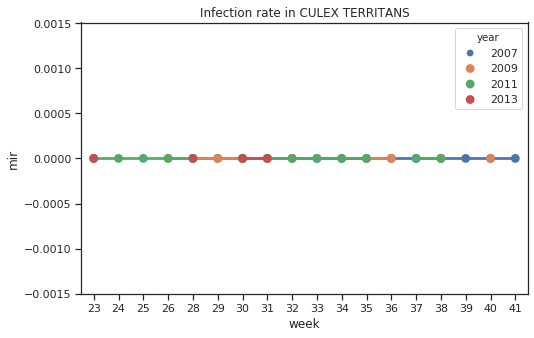

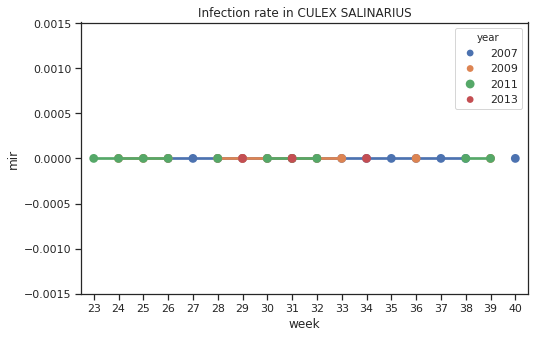

In [9]:
for species in set(mir.Species):
    plt.figure(figsize=(8,5))
    sns.pointplot(x='week', y='mir', data=mir[mir.Species==species], hue='year')
    plt.title(f'Infection rate in {species}')
    if species =='CULEX PIPIENS/RESTUANS':
        plt.savefig('../images/mir_CULEX_PIPIENS-RESTUANS.png')
    else:
        plt.savefig(f"../images/mir_{species}.png")
    plt.show()

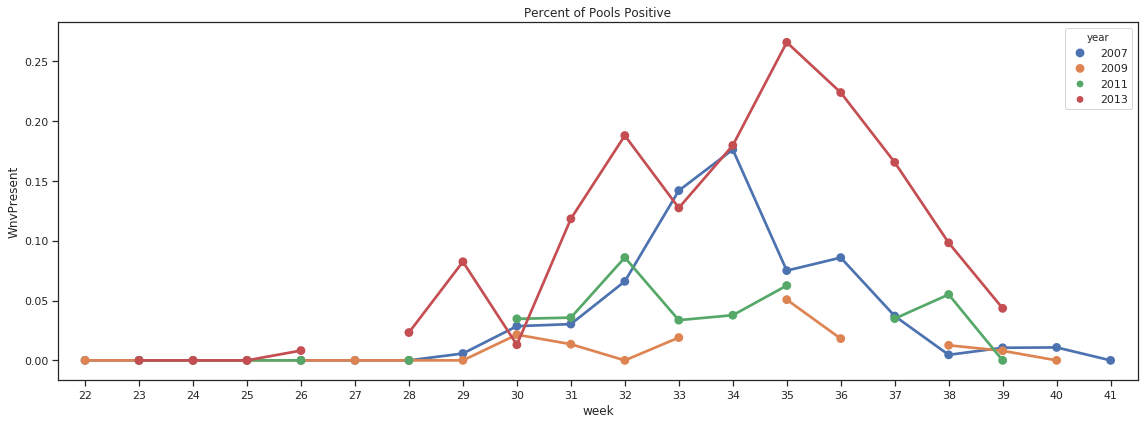

In [10]:
# Percent of Pools Positive Plot
train_mozzie=merged.groupby(['year','month','week']).mean().reset_index()
#train_mozzie.year=train_mozzie.year.map(lambda x:str(x))
train_mozzie.head()
plt.figure(figsize=(16,6))
sns.pointplot(x='week', y='WnvPresent', data=train_mozzie, hue='year')
plt.title('Percent of Pools Positive')
plt.tight_layout()
plt.savefig('../images/pct_pools_pos.png')


In [11]:
merged.head()

Test Date                 Species  Trap  \
0  2007-05-29  CULEX PIPIENS/RESTUANS  T002   
1  2007-05-29          CULEX RESTUANS  T002   
2  2007-05-29          CULEX RESTUANS  T007   
3  2007-05-29  CULEX PIPIENS/RESTUANS  T015   
4  2007-05-29          CULEX RESTUANS  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   

   NumMosquitos  WnvPresent  Station  year  month  week  \
0             1           0        1  2007      5    22   
1             1           0        1  2007      5    22   
2             1           0        1  2007      5    22   
3             1           0        1  2007      5    22   
4             4           0        1  2007      5    22   

                    daylight  Tmax  Tmin  Tavg  Depart  DewPoint  WetBulb  \
0  0 days 14:56:00.000000000    88    60    74      10        58       65   
1  0 days 14:56:00.000000000    88    60    74      10        58       65   
2  0 days 14:56:00.000000000    88    60    74      10        58       65   
3  0 days 14:56:00.000000000    88    60    74      10        58       65   
4  0 days 14:56:00.000000000    88    60    74      10        58       65   

   PrecipTotal  StnPressure  SeaLevel  ResultSpeed  ResultDir  AvgSpeed  \
0          0.0        29.39     30.11          5.8         18       6.5   
1          0.0        29.39     30.11          5.8         18       6.5   
2          0.0        29.39     30.11          5.8         18       6.5   
3          0.0        29.39     30.11          5.8         18       6.5   
4          0.0        29.39     30.11          5.8         18       6.5   

   Tmax_wkly  Tmin_wkly  Tavg_wkly  Depart_wkly  DewPoint_wkly  WetBulb_wkly  \
0  79.142857  56.428571       68.0     5.714286      50.571429     58.571429   
1  79.142857  56.428571       68.0     5.714286      50.571429     58.571429   
2  79.142857  56.428571       68.0     5.714286      50.571429     58.571429   
3  79.142857  56.428571       68.0     5.714286      50.571429     58.571429   
4  79.142857  56.428571       68.0     5.714286      50.571429     58.571429   

   PrecipTotal_wkly  StnPressure_wkly  SeaLevel_wkly  ResultSpeed_wkly  \
0          0.152857         29.404286      30.125714          7.642857   
1          0.152857         29.404286      30.125714          7.642857   
2          0.152857         29.404286      30.125714          7.642857   
3          0.152857         29.404286      30.125714          7.642857   
4          0.152857         29.404286      30.125714          7.642857   

   ResultDir_wkly  AvgSpeed_wkly  Tmax_wkly_lag7  Tmin_wkly_lag7  \
0       16.571429       9.485714       73.571429       46.714286   
1       16.571429       9.485714       73.571429       46.714286   
2       16.571429       9.485714       73.571429       46.714286   
3       16.571429       9.485714       73.571429       46.714286   
4       16.571429       9.485714       73.571429       46.714286   

   Tavg_wkly_lag7  Depart_wkly_lag7  DewPoint_wkly_lag7  WetBulb_wkly_lag7  \
0       60.285714          0.142857                40.0          49.714286   
1       60.285714          0.142857                40.0          49.714286   
2       60.285714          0.142857                40.0          49.714286   
3       60.285714          0.142857                40.0          49.714286   
4       60.285714          0.142857                40.0          49.714286   

   PrecipTotal_wkly_lag7  StnPressure_wkly_lag7  SeaLevel_wkly_lag7  \
0                   0.03                   29.4           30.122857   
1                   0.03       

In [12]:
# merged.dtypes

In [13]:
merged['Test Date'] = pd.to_datetime(merged['Test Date'])
merged['Spray Date'] = pd.to_datetime(merged['Spray Date'])

In [14]:
merged['Days between Spray and Test'] = (merged['Test Date'] - merged['Spray Date']).dt.days - 7

In [15]:
merged['Has been Sprayed'] = np.where((merged['Days between Spray and Test'] > 0) & (merged['Days between Spray and Test'] < 30), 1, 0)

In [16]:
merged['Has been Sprayed'].value_counts()

0    10398
1      108
Name: Has been Sprayed, dtype: int64

In [17]:
merged['Hour'] = merged.daylight.str[-18:-16]
merged['Minute'] = merged.daylight.str[-15:-13]
merged['Second'] = merged.daylight.str[-12:-10]

In [18]:
merged['Hour'] = merged['Hour'].astype(float)
merged['Minute'] = merged['Minute'].astype(float)
merged['Second'] = merged['Second'].astype(float)

In [19]:
merged['Daylight Hours'] = round((merged.Hour + merged.Minute/60 + merged.Second/3600),0)

In [20]:
merged['Daylight Hours'].value_counts()

15.0    4122
14.0    3383
13.0    1573
12.0    1402
11.0      26
Name: Daylight Hours, dtype: int64

In [21]:
merged['Daylight Hours'].dtype

dtype('float64')

In [22]:
merged.head()

Test Date                 Species  Trap             AddressNumberAndStreet  \
0 2007-05-29  CULEX PIPIENS/RESTUANS  T002  4100  N OAK PARK AVE, Chicago, IL   
1 2007-05-29          CULEX RESTUANS  T002  4100  N OAK PARK AVE, Chicago, IL   
2 2007-05-29          CULEX RESTUANS  T007   6200  N MANDELL AVE, Chicago, IL   
3 2007-05-29  CULEX PIPIENS/RESTUANS  T015    7900  W FOSTER AVE, Chicago, IL   
4 2007-05-29          CULEX RESTUANS  T015    7900  W FOSTER AVE, Chicago, IL   

    Latitude  Longitude  AddressAccuracy  NumMosquitos  WnvPresent  Station  \
0  41.954690 -87.800991                9             1           0        1   
1  41.954690 -87.800991                9             1           0        1   
2  41.994991 -87.769279                9             1           0        1   
3  41.974089 -87.824812                8             1           0        1   
4  41.974089 -87.824812                8             4           0        1   

   year  month  week                   daylight  Tmax  Tmin  Tavg  Depart  \
0  2007      5    22  0 days 14:56:00.000000000    88    60    74      10   
1  2007      5    22  0 days 14:56:00.000000000    88    60    74      10   
2  2007      5    22  0 days 14:56:00.000000000    88    60    74      10   
3  2007      5    22  0 days 14:56:00.000000000    88    60    74      10   
4  2007      5    22  0 days 14:56:00.000000000    88    60    74      10   

   DewPoint  WetBulb  PrecipTotal  StnPressure  SeaLevel  ResultSpeed  \
0        58       65          0.0        29.39     30.11          5.8   
1        58       65          0.0        29.39     30.11          5.8   
2        58       65          0.0        29.39     30.11          5.8   
3        58       65          0.0        29.39     30.11          5.8   
4        58       65          0.0        29.39     30.11          5.8   

   ResultDir  AvgSpeed  Tmax_wkly  Tmin_wkly  Tavg_wkly  Depart_wkly  \
0         18       6.5  79.142857  56.428571       68.0     5.714286   
1         18       6.5  79.142857  56.428571       68.0     5.714286   
2         18       6.5  79.142857  56.428571       68.0     5.714286   
3         18       6.5  79.142857  56.428571       68.0     5.714286   
4         18       6.5  79.142857  56.428571       68.0     5.714286   

   DewPoint_wkly  WetBulb_wkly  PrecipTotal_wkly  StnPressure_wkly  \
0      50.571429     58.571429          0.152857         29.404286   
1      50.571429     58.571429          0.152857         29.404286   
2      50.571429     58.571429          0.152857         29.404286   
3      50.571429     58.571429          0.152857         29.404286   
4      50.571429     58.571429          0.152857         29.404286   

   SeaLevel_wkly  ResultSpeed_wkly  ResultDir_wkly  AvgSpeed_wkly  \
0      30.125714          7.642857       16.571429       9.485714   
1      30.125714          7.642857       16.571429       9.485714   
2      30.125714          7.642857       16.571429       9.485714   
3      30.125714          7.642857       16.571429       9.485714   
4      30.125714          7.642857       16.571429       9.485714   

   Tmax_wkly_lag7  Tmin_wkly_lag7  Tavg_wkly_lag7  Depart_wkly_lag7  \
0       73.571429       46.714286       60.285714          0.142857   
1       73.571429       46.714286       60.285714          0.142857   
2       73.571429       46.714286       60.285714          0.142857   
3       73.571429       46.714286       60.285714          0.142857   
4       73.571429       46.714286       60.285714          0.142857   

   DewPoint_wkly_lag7  WetBulb_wkly_lag7  PrecipTotal_wkly_lag7  \
0                40.0          49.714286                   0.03   
1                40.0          49.714286                   0.03   
2                40.0          49.714286                   0.03   
3                40.0          49.714286                   0.03   
4                40.0          49.714286                   0.03   

   StnPressure_wkly_lag7  SeaLevel_wkly_

In [23]:
merged.to_csv('../data/merged.csv', index=False)

---

# Modeling

In [24]:
# Imports for Modeling
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

from operator import itemgetter

from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Test/Train Split

### Selecting columns to include to X

In [25]:
merged.columns

Index(['Test Date', 'Species', 'Trap', 'AddressNumberAndStreet', 'Latitude',
       'Longitude', 'AddressAccuracy', 'NumMosquitos', 'WnvPresent', 'Station',
       'year', 'month', 'week', 'daylight', 'Tmax', 'Tmin', 'Tavg', 'Depart',
       'DewPoint', 'WetBulb', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed', 'Tmax_wkly', 'Tmin_wkly',
       'Tavg_wkly', 'Depart_wkly', 'DewPoint_wkly', 'WetBulb_wkly',
       'PrecipTotal_wkly', 'StnPressure_wkly', 'SeaLevel_wkly',
       'ResultSpeed_wkly', 'ResultDir_wkly', 'AvgSpeed_wkly', 'Tmax_wkly_lag7',
       'Tmin_wkly_lag7', 'Tavg_wkly_lag7', 'Depart_wkly_lag7',
       'DewPoint_wkly_lag7', 'WetBulb_wkly_lag7', 'PrecipTotal_wkly_lag7',
       'StnPressure_wkly_lag7', 'SeaLevel_wkly_lag7', 'ResultSpeed_wkly_lag7',
       'ResultDir_wkly_lag7', 'AvgSpeed_wkly_lag7', 'Tmax_wkly_lag14',
       'Tmin_wkly_lag14', 'Tavg_wkly_lag14', 'Depart_wkly_lag14',
       'DewPoint_wkly_lag14', 'WetBulb_wkly_lag14', 'P

In [26]:
features_selected = ['Latitude',
       'Longitude', 'AddressAccuracy', 'year', 'month', 'week','Tmax', 'Tmin', 'Tavg', 'Depart',
       'DewPoint', 'WetBulb', 'PrecipTotal', 'StnPressure',
       'ResultSpeed', 'ResultDir', 'AvgSpeed', 'Tmax_wkly', 'Tmin_wkly',
       'Tavg_wkly', 'Depart_wkly', 'DewPoint_wkly', 'WetBulb_wkly',
       'PrecipTotal_wkly', 'StnPressure_wkly',
       'ResultSpeed_wkly', 'ResultDir_wkly', 'AvgSpeed_wkly','CULEX ERRATICUS', 'CULEX PIPIENS', 'CULEX PIPIENS/RESTUANS',
       'CULEX RESTUANS', 'CULEX SALINARIUS', 'CULEX TARSALIS',
       'CULEX TERRITANS', 'Daylight Hours',
       'Days between Spray and Test', 
       'Has been Sprayed','NumMosquitos', 'WnvPresent']

In [27]:
train = merged[features_selected]
train.head()

Latitude  Longitude  AddressAccuracy  year  month  week  Tmax  Tmin  Tavg  \
0  41.954690 -87.800991                9  2007      5    22    88    60    74   
1  41.954690 -87.800991                9  2007      5    22    88    60    74   
2  41.994991 -87.769279                9  2007      5    22    88    60    74   
3  41.974089 -87.824812                8  2007      5    22    88    60    74   
4  41.974089 -87.824812                8  2007      5    22    88    60    74   

   Depart  DewPoint  WetBulb  PrecipTotal  StnPressure  ResultSpeed  \
0      10        58       65          0.0        29.39          5.8   
1      10        58       65          0.0        29.39          5.8   
2      10        58       65          0.0        29.39          5.8   
3      10        58       65          0.0        29.39          5.8   
4      10        58       65          0.0        29.39          5.8   

   ResultDir  AvgSpeed  Tmax_wkly  Tmin_wkly  Tavg_wkly  Depart_wkly  \
0         18       6.5  79.142857  56.428571       68.0     5.714286   
1         18       6.5  79.142857  56.428571       68.0     5.714286   
2         18       6.5  79.142857  56.428571       68.0     5.714286   
3         18       6.5  79.142857  56.428571       68.0     5.714286   
4         18       6.5  79.142857  56.428571       68.0     5.714286   

   DewPoint_wkly  WetBulb_wkly  PrecipTotal_wkly  StnPressure_wkly  \
0      50.571429     58.571429          0.152857         29.404286   
1      50.571429     58.571429          0.152857         29.404286   
2      50.571429     58.571429          0.152857         29.404286   
3      50.571429     58.571429          0.152857         29.404286   
4      50.571429     58.571429          0.152857         29.404286   

   ResultSpeed_wkly  ResultDir_wkly  AvgSpeed_wkly  CULEX ERRATICUS  \
0          7.642857       16.571429       9.485714                0   
1          7.642857       16.571429       9.485714                0   
2          7.642857       16.571429       9.485714                0   
3          7.642857       16.571429       9.485714                0   
4          7.642857       16.571429       9.485714                0   

   CULEX PIPIENS  CULEX PIPIENS/RESTUANS  CULEX RESTUANS  CULEX SALINARIUS  \
0              0                       1               0                 0   
1              0                       0               1                 0   
2              0                       0               1                 0   
3              0                       1               0                 0   
4              0                       0               1                 0   

   CULEX TARSALIS  CULEX TERRITANS  Daylight Hours  \
0               0                0            15.0   
1               0                0            15.0   
2               0                0            15.0   
3               0                0            15.0   
4               0                0            15.0   

   Days between Spray and Test  Has been Sprayed  NumMosquitos  WnvPresent  
0                          NaN                 0             1           0  
1                          NaN                 0             1           0  
2                          NaN                 0             1           0  
3                      -1509.0                 0             1           0  
4                      -1509.0                 0             4           0

In [28]:
train.isnull().sum().tail()

Daylight Hours                    0
Days between Spray and Test    8432
Has been Sprayed                  0
NumMosquitos                      0
WnvPresent                        0
dtype: int64

In [29]:
train['Days between Spray and Test'].fillna(0, inplace=True)

In [30]:
train.isnull().sum().tail()

Daylight Hours                 0
Days between Spray and Test    0
Has been Sprayed               0
NumMosquitos                   0
WnvPresent                     0
dtype: int64

In [31]:
train.dtypes.tail()

Daylight Hours                 float64
Days between Spray and Test    float64
Has been Sprayed                 int64
NumMosquitos                     int64
WnvPresent                       int64
dtype: object

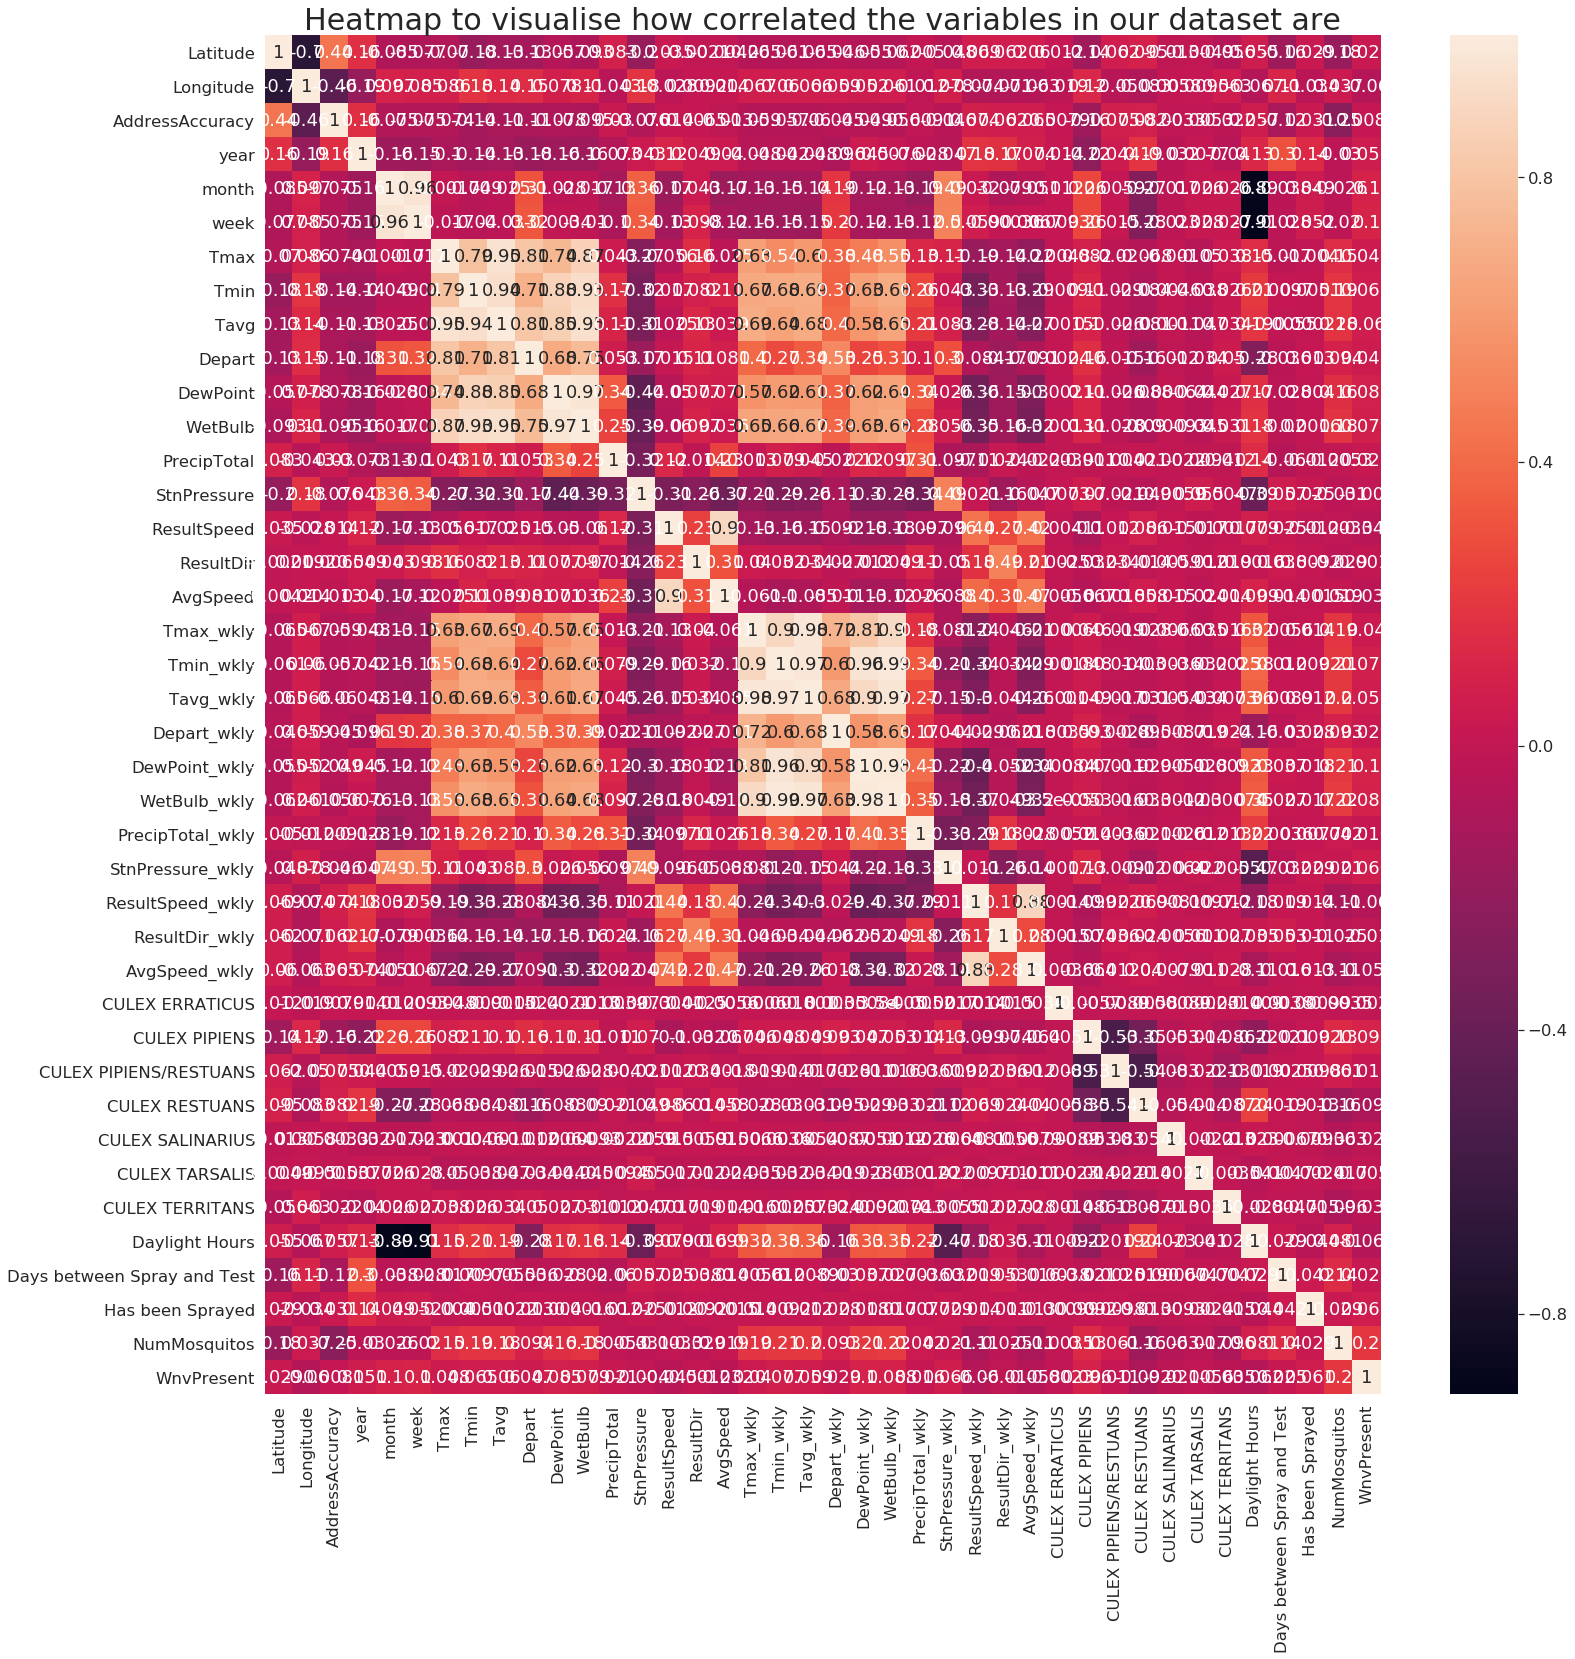

In [32]:
sns.set(font_scale=1.5)
plt.figure(figsize=(25,25))
sns.heatmap(train.corr(), annot = True);
plt.title("Heatmap to visualise how correlated the variables in our dataset are", fontsize=30);

In [33]:
X = train.drop(columns=['WnvPresent', 'NumMosquitos'])
y = train['WnvPresent']

In [34]:
X.head()

Latitude  Longitude  AddressAccuracy  year  month  week  Tmax  Tmin  Tavg  \
0  41.954690 -87.800991                9  2007      5    22    88    60    74   
1  41.954690 -87.800991                9  2007      5    22    88    60    74   
2  41.994991 -87.769279                9  2007      5    22    88    60    74   
3  41.974089 -87.824812                8  2007      5    22    88    60    74   
4  41.974089 -87.824812                8  2007      5    22    88    60    74   

   Depart  DewPoint  WetBulb  PrecipTotal  StnPressure  ResultSpeed  \
0      10        58       65          0.0        29.39          5.8   
1      10        58       65          0.0        29.39          5.8   
2      10        58       65          0.0        29.39          5.8   
3      10        58       65          0.0        29.39          5.8   
4      10        58       65          0.0        29.39          5.8   

   ResultDir  AvgSpeed  Tmax_wkly  Tmin_wkly  Tavg_wkly  Depart_wkly  \
0         18       6.5  79.142857  56.428571       68.0     5.714286   
1         18       6.5  79.142857  56.428571       68.0     5.714286   
2         18       6.5  79.142857  56.428571       68.0     5.714286   
3         18       6.5  79.142857  56.428571       68.0     5.714286   
4         18       6.5  79.142857  56.428571       68.0     5.714286   

   DewPoint_wkly  WetBulb_wkly  PrecipTotal_wkly  StnPressure_wkly  \
0      50.571429     58.571429          0.152857         29.404286   
1      50.571429     58.571429          0.152857         29.404286   
2      50.571429     58.571429          0.152857         29.404286   
3      50.571429     58.571429          0.152857         29.404286   
4      50.571429     58.571429          0.152857         29.404286   

   ResultSpeed_wkly  ResultDir_wkly  AvgSpeed_wkly  CULEX ERRATICUS  \
0          7.642857       16.571429       9.485714                0   
1          7.642857       16.571429       9.485714                0   
2          7.642857       16.571429       9.485714                0   
3          7.642857       16.571429       9.485714                0   
4          7.642857       16.571429       9.485714                0   

   CULEX PIPIENS  CULEX PIPIENS/RESTUANS  CULEX RESTUANS  CULEX SALINARIUS  \
0              0                       1               0                 0   
1              0                       0               1                 0   
2              0                       0               1                 0   
3              0                       1               0                 0   
4              0                       0               1                 0   

   CULEX TARSALIS  CULEX TERRITANS  Daylight Hours  \
0               0                0            15.0   
1               0                0            15.0   
2               0                0            15.0   
3               0                0            15.0   
4               0                0            15.0   

   Days between Spray and Test  Has been Sprayed  
0                          0.0                 0  
1                          0.0                 0  
2                          0.0                 0  
3                      -1509.0                 0  
4                      -1509.0                 0

In [35]:
X.shape

(10506, 38)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,
                                                    stratify=y)

In [37]:
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

### Balance Classes by: Oversampling (SMOTE)

In [38]:
# Oversampling on training data only
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(Xs_train, y_train)

In [39]:
print(X_res.shape)
print(y_res.shape)

(13936, 38)
(13936,)


In [40]:
model = []
parameters = []
scores = []
precision = []
recall = []
ra_score = []

# To put the name of model, models from sklearn, and hyperparameters of the model we want to search through in order

names = ['Decision Tree', 'RandomForest', 'LogReg','KNN','SVC','AdaBoost', 'BaggingClass', 'GradientBoost']

estimators = [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier(),
             SVC(), AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier()]

In [41]:
params = [
    {'clf__max_depth': [None, 10, 15, 20, 30, 35],
    'clf__min_samples_split': [5,10,15,20,25,30]}, #DecisionTree

    {'clf__max_depth': [None,50,75,100,150,200],
     'clf__min_samples_split': [5,10,15,20,30]}, #RandomForest
    
    {'clf__C':[1,3,5,10],
     'clf__solver':['lbfgs', 'liblinear', 'sag', 'saga'],
     'clf__max_iter':[50,100,125,150,175,200]}, #LogisticRegression
    
    {'clf__n_neighbors':[3,5,10,15,20,25],
     'clf__weights':['uniform','distance'],
     'clf__p':[1,2,3]}, #KNeighborsClassifier
    
    {'clf__kernel':['rbf']}, #SVC - 'something wrong with 'sigmoid','poly','linear'
    
    {'clf__n_estimators':[25,40,50,100,200,500]}, #AdaBoost
    
    {'clf__n_estimators':[10,30,50,100],
     'clf__max_samples':[1,5,10],
     'clf__max_features':[1,5,10]}, #BaggingClassifier
    
    {'clf__loss' : ['deviance', 'exponential'],
     'clf__n_estimators':[50,75,100,200,500],
     'clf__max_features': [None, 'auto','sqrt','log2']} #GradientBoosting
]

In [42]:
for name, estimator, param in zip(names, estimators, params):
    clf_pipe = Pipeline([
        # not sure if we need to scale the X
        # removed ('ss', StandardScaler),
        ('clf', estimator)
    ])
#     cv = StratifiedKFold(shuffle=True, n_splits=3)
    cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
    gs = GridSearchCV(clf_pipe, param_grid=param, cv=cv, verbose=10, n_jobs=-1)
    gs.fit(X_res, y_res)
    
    print(name)
    print('Best Score: {}'.format(gs.best_score_))
    print('Best Params: {}'.format(gs.best_params_))
    
    # Best Model
    grid_model = gs.best_estimator_
    
    print('Model Score on X_train: {}'.format(grid_model.score(X_train, y_train)))
    
    # Prediction and score
    pred = grid_model.predict(X_test)
    print('Accuracy score of prediction: {}'.format(accuracy_score(y_test, pred)))
    
    
    # Confusion Matrix 
    conf_matrix = confusion_matrix(y_test, pred)
    
    tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
    print('TN: {}, FP:{}, FN:{}, TP:{}'.format(tn,fp,fn,tp))
    print('Precision of the model is {}'. format(tp/(tp+fp)))
    print('Recall of the model is {}'.format(tp/(tp+fn)))
    
    #roc_auc
    ra = roc_auc_score(y_test, pred)
    print ('ROC_AUC: {}'.format(ra))
   
    
    print('\n')
    model.append(name)
    parameters.append(gs.best_params_)
    scores.append(accuracy_score(y_test, pred))
    recall.append(tp/(tp+fn))
    precision.append(tp/(tp+fp))
    ra_score.append(ra) 

In [43]:
results = pd.DataFrame({'model': model, 
              'parameters': parameters, 
              'scores': scores, 
              'recall': recall, 
              'precision': precision,
              'roc_auc':ra_score
                       })
results

### The following section is added to check the predict_proba scores

#### P/S: wasn't able to add this into the loop, so it was done manually instead

In [44]:
estimators = [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier(),
             SVC(), AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier()]

In [45]:
model = DecisionTreeClassifier(max_depth = 5 , min_samples_split=25)
DTC = model.fit(X_train, y_train)
pred = DTC.predict(X_test)
roc_auc_score(y_test, pred)

0.5

In [46]:
# plt.figure(figsize=(50,50))
# tree.plot_tree(model, feature_names=X_train.columns);

In [47]:
model = RandomForestClassifier(max_depth = 100 , min_samples_split=30)
RF = model.fit(X_train, y_train)
pred = RF.predict(X_test)
roc_auc_score(y_test, pred)

0.5117864280569335

In [48]:
model = LogisticRegression(C=3, max_iter=175 , solver='lbfgs')
LogReg = model.fit(X_train, y_train)
pred = LogReg.predict(X_test)
roc_auc_score(y_test, pred)

0.5

In [49]:
model = KNeighborsClassifier(n_neighbors=25, p=2, weights='uniform')
Knn = model.fit(X_train, y_train)
pred = Knn.predict(X_test)
roc_auc_score(y_test, pred)

0.5

In [50]:
model = SVC(kernel='rbf', probability=True)
svc = model.fit(X_train, y_train)
pred = svc.predict(X_test)
roc_auc_score(y_test, pred)

0.5

In [51]:
model = AdaBoostClassifier(n_estimators=25)
Ada = model.fit(X_train, y_train)
pred = Ada.predict(X_test)
roc_auc_score(y_test, pred)

0.5

In [52]:
model = GradientBoostingClassifier(loss='exponential', max_features='log2', n_estimators=200)
GB = model.fit(X_train, y_train)
pred = GB.predict(X_test)
roc_auc_score(y_test, pred)

0.5119538200890728

In [53]:
def eval_sklearn_model(y_true, predictions, model=None, X=None):
    """This function takes the true values for y and the predictions made by the model and prints out the confusion matrix along with Accuracy, Precision, and, if model and X provided, Roc_Auc Scores."""
    cnf_matrix = confusion_matrix(y_true, predictions)
    print('True Negative: ', cnf_matrix[0, 0], '| False Positive: ', cnf_matrix[0, 1])
    print('False Negative: ', cnf_matrix[1, 0], '| True Positive: ', cnf_matrix[1, 1], '\n')
    sensitivity = cnf_matrix[1, 1]/ (cnf_matrix[1, 0] + cnf_matrix[1, 1])
    specificity = cnf_matrix[0, 0]/ (cnf_matrix[0, 1] + cnf_matrix[0, 0])
    print('Sensitivity (TP/ TP + FN): ', sensitivity)
    print('Specificity (TN/ TN + FP): ', specificity, '\n')
    print('Accuracy: ', accuracy_score(y_true, predictions, normalize=True))
    print('Precision: ', precision_score(y_true, predictions))
    if model != None:
        print('Roc-Auc: ', roc_auc_score(y_true, [x[1] for x in model.predict_proba(X)]))
    else:
        pass
    print('\n')

xgb = XGBClassifier(scale_pos_weight=(6969/385), objective='binary:logistic')
xgb.fit(X_train, y_train)
test_predictions = xgb.predict(X_test)
eval_sklearn_model(y_test, test_predictions, model=xgb, X=X_test)

True Negative:  2231 | False Positive:  756
False Negative:  38 | True Positive:  127 

Sensitivity (TP/ TP + FN):  0.7696969696969697
Specificity (TN/ TN + FP):  0.7469032474054235 

Accuracy:  0.7480964467005076
Precision:  0.1438278595696489
Roc-Auc:  0.836508709458157




### Preprocessing the same way for the test set

In [54]:
test2 = pd.read_csv('../data/merged_test.csv', index_col='Unnamed: 0')

In [55]:
test2.head(2)

Id   Test Date                 Species  Trap  \
0   1  2008-06-11  CULEX PIPIENS/RESTUANS  T002   
1   2  2008-06-11          CULEX RESTUANS  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   Station  year  month  week                   daylight  Tmax  Tmin  Tavg  \
0        1  2008      6    24  0 days 15:10:00.000000000    86    61    74   
1        1  2008      6    24  0 days 15:10:00.000000000    86    61    74   

   Depart  DewPoint  WetBulb  PrecipTotal  StnPressure  SeaLevel  ResultSpeed  \
0       7        56       64          0.0        29.28     29.99          8.9   
1       7        56       64          0.0        29.28     29.99          8.9   

   ResultDir  AvgSpeed  Tmax_wkly  Tmin_wkly  Tavg_wkly  Depart_wkly  \
0         18      10.0  83.285714  64.428571  74.142857          8.0   
1         18      10.0  83.285714  64.428571  74.142857          8.0   

   DewPoint_wkly  WetBulb_wkly  PrecipTotal_wkly  StnPressure_wkly  \
0      64.428571     68.142857          0.304286         29.128571   
1      64.428571     68.142857          0.304286         29.128571   

   SeaLevel_wkly  ResultSpeed_wkly  ResultDir_wkly  AvgSpeed_wkly  \
0      29.832857              10.8       20.285714           12.6   
1      29.832857              10.8       20.285714           12.6   

   Tmax_wkly_lag7  Tmin_wkly_lag7  Tavg_wkly_lag7  Depart_wkly_lag7  \
0       75.714286       53.428571       64.714286          0.714286   
1       75.714286       53.428571       64.714286          0.714286   

   DewPoint_wkly_lag7  WetBulb_wkly_lag7  PrecipTotal_wkly_lag7  \
0           52.142857          57.714286               0.132857   
1           52.142857          57.714286               0.132857   

   StnPressure_wkly_lag7  SeaLevel_wkly_lag7  ResultSpeed_wkly_lag7  \
0              29.111429           29.842857               5.857143   
1              29.111429           29.842857               5.857143   

   ResultDir_wkly_lag7  AvgSpeed_wkly_lag7  Tmax_wkly_lag14  Tmin_wkly_lag14  \
0            12.285714                 7.3        64.857143        43.857143   
1            12.285714                 7.3        64.857143        43.857143   

   Tavg_wkly_lag14  Depart_wkly_lag14  DewPoint_wkly_lag14  \
0        54.571429          -7.285714                 42.0   
1        54.571429          -7.285714                 42.0   

   WetBulb_wkly_lag14  PrecipTotal_wkly_lag14  StnPressure_wkly_lag14  \
0           49.142857                0.068571               29.354286   
1           49.142857                0.068571               29.354286   

   SeaLevel_wkly_lag14  ResultSpeed_wkly_lag14  ResultDir_wkly_lag14  \
0            30.072857               10.114286              9.571429   
1            30.072857               10.114286              9.571429   

   AvgSpeed_wkly_lag14  Tmax_wkly_lag21  Tmin_wkly_lag21  Tavg_wkly_lag21  \
0            11.542857        64.285714        43.857143        54.428571   
1            11.542857        64.285714        43.857143        54.428571   

   Depart_wkly_lag21  DewPoint_wkly_lag21  WetBulb_wkly_lag21  \
0          -5.285714            37.714286           46.857143   
1          -5.285714            37.714286           46.857143   

   PrecipTotal_wkly_lag21  StnPressure_wkly_lag21  SeaLevel_wkly_lag21  \
0                0.017143               29.018571            29.744286   
1                0.017143               29.018571            29.744286   

   ResultSpeed_wkly_lag21  ResultDir_wkly_lag21  AvgSpeed_wkly_lag21  \
0                7.214286             23.428571             9.185714   
1                7.214286             23.428571             9.185714   

   midpt_Lat  midpt_Lon  Cluster Spray Date  CULEX ERRATICUS  CULEX PIPIENS  \
0        NaN        NaN      NaN        NaN              

In [56]:
features_selected.remove('WnvPresent')
features_selected.remove('NumMosquitos')

In [57]:
X_test = test2[features_selected]
X_test.head()

Latitude  Longitude  AddressAccuracy  year  month  week  Tmax  Tmin  Tavg  \
0  41.95469 -87.800991                9  2008      6    24    86    61    74   
1  41.95469 -87.800991                9  2008      6    24    86    61    74   
2  41.95469 -87.800991                9  2008      6    24    86    61    74   
3  41.95469 -87.800991                9  2008      6    24    86    61    74   
4  41.95469 -87.800991                9  2008      6    24    86    61    74   

   Depart  DewPoint  WetBulb  PrecipTotal  StnPressure  ResultSpeed  \
0       7        56       64          0.0        29.28          8.9   
1       7        56       64          0.0        29.28          8.9   
2       7        56       64          0.0        29.28          8.9   
3       7        56       64          0.0        29.28          8.9   
4       7        56       64          0.0        29.28          8.9   

   ResultDir  AvgSpeed  Tmax_wkly  Tmin_wkly  Tavg_wkly  Depart_wkly  \
0         18      10.0  83.285714  64.428571  74.142857          8.0   
1         18      10.0  83.285714  64.428571  74.142857          8.0   
2         18      10.0  83.285714  64.428571  74.142857          8.0   
3         18      10.0  83.285714  64.428571  74.142857          8.0   
4         18      10.0  83.285714  64.428571  74.142857          8.0   

   DewPoint_wkly  WetBulb_wkly  PrecipTotal_wkly  StnPressure_wkly  \
0      64.428571     68.142857          0.304286         29.128571   
1      64.428571     68.142857          0.304286         29.128571   
2      64.428571     68.142857          0.304286         29.128571   
3      64.428571     68.142857          0.304286         29.128571   
4      64.428571     68.142857          0.304286         29.128571   

   ResultSpeed_wkly  ResultDir_wkly  AvgSpeed_wkly  CULEX ERRATICUS  \
0              10.8       20.285714           12.6                0   
1              10.8       20.285714           12.6                0   
2              10.8       20.285714           12.6                0   
3              10.8       20.285714           12.6                0   
4              10.8       20.285714           12.6                0   

   CULEX PIPIENS  CULEX PIPIENS/RESTUANS  CULEX RESTUANS  CULEX SALINARIUS  \
0              0                       1               0                 0   
1              0                       0               1                 0   
2              1                       0               0                 0   
3              0                       0               0                 1   
4              0                       0               0                 0   

   CULEX TARSALIS  CULEX TERRITANS  Daylight Hours  \
0               0                0            15.0   
1               0                0            15.0   
2               0                0            15.0   
3               0                0            15.0   
4               0                1            15.0   

   Days between Spray and Test  Has been Sprayed  
0                          NaN                 0  
1                          NaN                 0  
2                          NaN                 0  
3                          NaN                 0  
4                          NaN                 0

In [58]:
X_test.isnull().sum()

Latitude                           0
Longitude                          0
AddressAccuracy                    0
year                               0
month                              0
week                               0
Tmax                               0
Tmin                               0
Tavg                               0
Depart                             0
DewPoint                           0
WetBulb                            0
PrecipTotal                        0
StnPressure                        0
ResultSpeed                        0
ResultDir                          0
AvgSpeed                           0
Tmax_wkly                          0
Tmin_wkly                          0
Tavg_wkly                          0
Depart_wkly                        0
DewPoint_wkly                      0
WetBulb_wkly                       0
PrecipTotal_wkly                   0
StnPressure_wkly                   0
ResultSpeed_wkly                   0
ResultDir_wkly                     0
A

In [59]:
X_test['Days between Spray and Test'] = X_test['Days between Spray and Test'].fillna(0)

### Use this as our final model

In [60]:
ss = StandardScaler()
Xs_train = ss.fit_transform(X)
Xs_test = ss.transform(X_test)

In [61]:
# Oversampling on training data only
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(Xs_train, y)

In [62]:
# model = GradientBoostingClassifier(loss='exponential', max_features='log2', n_estimators=200)
# GB = model.fit(X_res, y_res)
# pred = GB.predict(X_test)
# roc_auc_score(y_test, pred)

In [63]:
#use this final model

model = XGBClassifier(scale_pos_weight=(6969/385), objective='binary:logistic')
model.fit(X_res, y_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=18.101298701298703,
              seed=None, silent=None, subsample=1, verbosity=1)

In [64]:
final_pred = model.predict_proba(Xs_test)[:,1]

In [65]:
final_pred.shape

(116293,)

### From the final prediction, combine to create a new database for submission

In [66]:
sample = pd.read_csv('../data/sampleSubmission.csv')
sub = pd.DataFrame()
sub['Id']=sample['Id']
sub['WnvPresent'] = final_pred
print(sub.shape)
sub.head()

(116293, 2)


Id  WnvPresent
0   1    0.055083
1   2    0.047765
2   3    0.016844
3   4    0.027743
4   5    0.011342

In [67]:
sub.to_csv('../data/kaggleSubmission.csv',index=False)

### To visualise the location with the probability of virus happnening

In [68]:
test2.head()

Id   Test Date                 Species  Trap  \
0   1  2008-06-11  CULEX PIPIENS/RESTUANS  T002   
1   2  2008-06-11          CULEX RESTUANS  T002   
2   3  2008-06-11           CULEX PIPIENS  T002   
3   4  2008-06-11        CULEX SALINARIUS  T002   
4   5  2008-06-11         CULEX TERRITANS  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
2  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
3  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
4  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   Station  year  month  week                   daylight  Tmax  Tmin  Tavg  \
0        1  2008      6    24  0 days 15:10:00.000000000    86    61    74   
1        1  2008      6    24  0 days 15:10:00.000000000    86    61    74   
2        1  2008      6    24  0 days 15:10:00.000000000    86    61    74   
3        1  2008      6    24  0 days 15:10:00.000000000    86    61    74   
4        1  2008      6    24  0 days 15:10:00.000000000    86    61    74   

   Depart  DewPoint  WetBulb  PrecipTotal  StnPressure  SeaLevel  ResultSpeed  \
0       7        56       64          0.0        29.28     29.99          8.9   
1       7        56       64          0.0        29.28     29.99          8.9   
2       7        56       64          0.0        29.28     29.99          8.9   
3       7        56       64          0.0        29.28     29.99          8.9   
4       7        56       64          0.0        29.28     29.99          8.9   

   ResultDir  AvgSpeed  Tmax_wkly  Tmin_wkly  Tavg_wkly  Depart_wkly  \
0         18      10.0  83.285714  64.428571  74.142857          8.0   
1         18      10.0  83.285714  64.428571  74.142857          8.0   
2         18      10.0  83.285714  64.428571  74.142857          8.0   
3         18      10.0  83.285714  64.428571  74.142857          8.0   
4         18      10.0  83.285714  64.428571  74.142857          8.0   

   DewPoint_wkly  WetBulb_wkly  PrecipTotal_wkly  StnPressure_wkly  \
0      64.428571     68.142857          0.304286         29.128571   
1      64.428571     68.142857          0.304286         29.128571   
2      64.428571     68.142857          0.304286         29.128571   
3      64.428571     68.142857          0.304286         29.128571   
4      64.428571     68.142857          0.304286         29.128571   

   SeaLevel_wkly  ResultSpeed_wkly  ResultDir_wkly  AvgSpeed_wkly  \
0      29.832857              10.8       20.285714           12.6   
1      29.832857              10.8       20.285714           12.6   
2      29.832857              10.8       20.285714           12.6   
3      29.832857              10.8       20.285714           12.6   
4      29.832857              10.8       20.285714           12.6   

   Tmax_wkly_lag7  Tmin_wkly_lag7  Tavg_wkly_lag7  Depart_wkly_lag7  \
0       75.714286       53.428571       64.714286          0.714286   
1       75.714286       53.428571       64.714286          0.714286   
2       75.714286       53.428571       64.714286          0.714286   
3       75.714286       53.428571       64.714286          0.714286   
4       75.714286       53.428571       64.714286          0.714286   

   DewPoint_wkly_lag7  WetBulb_wkly_lag7  PrecipTotal_wkly_lag7  \
0           52.142857          57.714286               0.132857   
1           52.142857          57.714286               0.132857   
2           52.142857          57.714286               0.132857   
3           52.142857          57.714286               0.132857   
4           52.142857          57.714286               0.132857   

   StnPressure_wkly_lag7  SeaLevel_wkly_lag7  ResultSpeed_wkly_lag7  \
0              29.111429           29.842857               5.857143   
1              29.111429      

In [69]:
sub['Latitude']=test2['Latitude']
sub['Longitude']=test2['Longitude']

In [70]:
sub.WnvPresent.sort_values(ascending = False)

88222     0.992246
88094     0.992246
86885     0.991432
87013     0.991432
89120     0.991171
88558     0.991104
88446     0.991104
109445    0.990956
109486    0.990956
88225     0.990901
88220     0.990901
88092     0.990901
88226     0.990901
88097     0.990901
88227     0.990901
88099     0.990901
88098     0.990901
89118     0.990898
105740    0.990745
105700    0.990745
109443    0.990676
109484    0.990676
105698    0.990458
105738    0.990458
89125     0.990446
89123     0.990446
89124     0.990446
87902     0.990246
89022     0.990221
89023     0.990221
109490    0.990213
109491    0.990213
109489    0.990213
109449    0.990213
109448    0.990213
109450    0.990213
87237     0.990172
87349     0.990172
105743    0.989985
105744    0.989985
105745    0.989985
105705    0.989985
105704    0.989985
105703    0.989985
87011     0.989948
86888     0.989948
86889     0.989948
86890     0.989948
86883     0.989948
87016     0.989948
87017     0.989948
87018     0.989948
87900     0.

<function matplotlib.pyplot.legend(*args, **kwargs)>

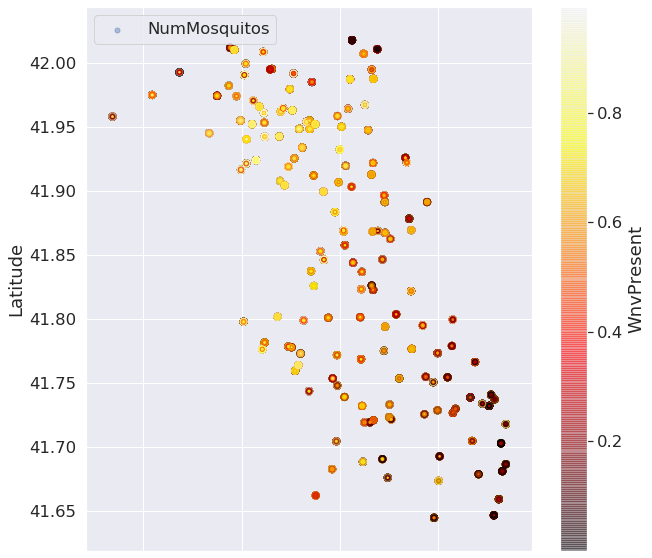

In [71]:
sub.plot(kind='scatter', x= 'Longitude', y='Latitude', alpha=0.4,
             s=train['NumMosquitos'], label='NumMosquitos', figsize=(10,10),
            c ='WnvPresent', cmap = plt.get_cmap("hot"),colorbar=True)
plt.legend

#Size of circle = Number of Mosquitos
#Colour['Red'] = WNV Present

In [72]:
sub[['Longitude', 'Latitude']][sub.WnvPresent>0.5].drop_duplicates().shape

(151, 2)

In [73]:
sub.head()

Id  WnvPresent  Latitude  Longitude
0   1    0.055083  41.95469 -87.800991
1   2    0.047765  41.95469 -87.800991
2   3    0.016844  41.95469 -87.800991
3   4    0.027743  41.95469 -87.800991
4   5    0.011342  41.95469 -87.800991

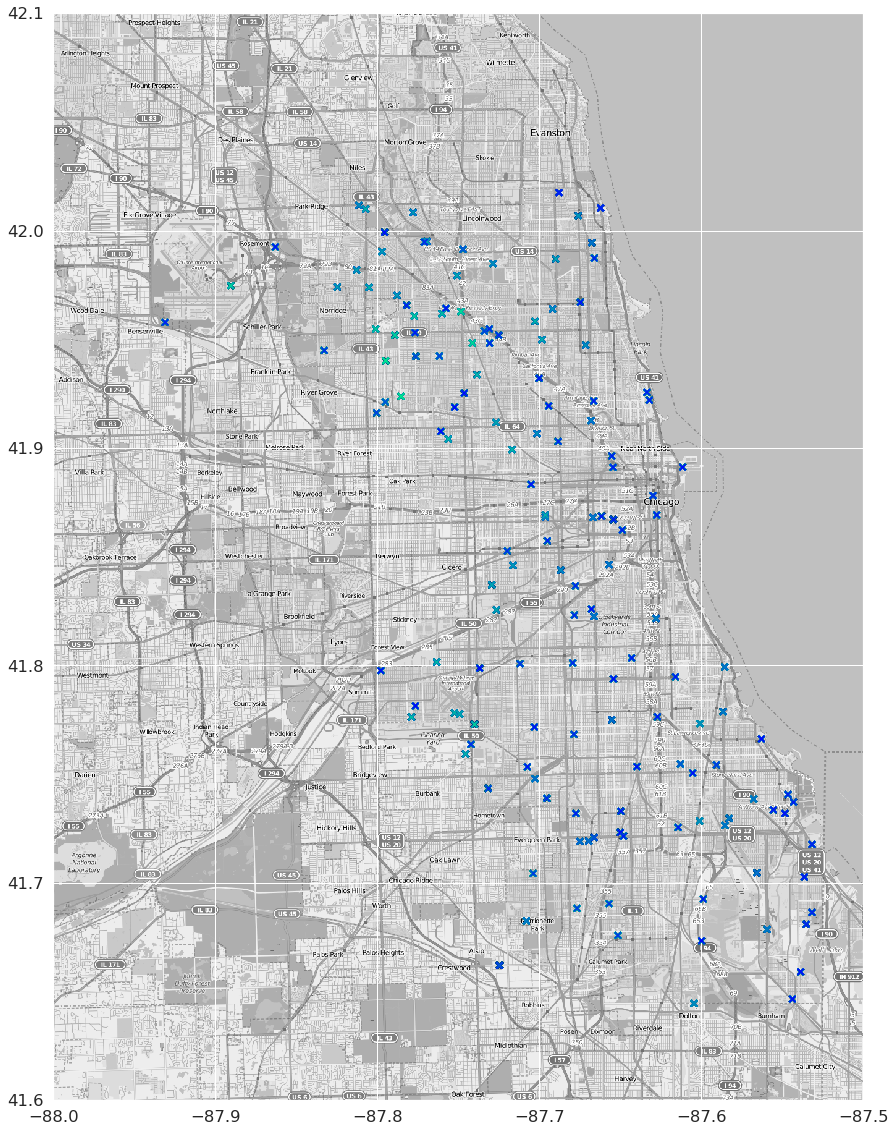

In [74]:
mapdata = np.loadtxt("../data/mapdata_copyright_openstreetmap_contributors.txt")
# traps = pd.read_csv('../data/merged_test.csv')[['Date', 'Trap','Longitude', 'Latitude']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(20,20))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)


locations = sub[['Longitude', 'Latitude']].drop_duplicates().values
l2 = sub[['Longitude', 'Latitude','WnvPresent']][sub.WnvPresent>0.3].drop_duplicates().values

plt.scatter(l2[:,0], l2[:,1], marker='x',
           c = l2[:,2], cmap = plt.get_cmap("winter"))
# plt.scatter(locations[:,0], locations[:,1], marker='o',
#            c = locations[:,1], cmap = plt.get_cmap("winter"))


plt.savefig('heatmap.png')

In [75]:
#Export this file to do cost analysis
sub.to_csv('../data/sub_cba.csv',index=False)

In [76]:
sub['AddressNumberAndStreet']=test2['AddressNumberAndStreet']

In [77]:
#Explore the coefficients of the Logreg model
coef = pd.DataFrame(LogReg.coef_, columns=X.columns).T
coef

0
Latitude                     0.003848
Longitude                    0.004636
AddressAccuracy              0.168589
year                        -0.025836
month                        0.129994
week                         0.501889
Tmax                         0.055488
Tmin                         0.001778
Tavg                         0.046335
Depart                      -0.108032
DewPoint                    -0.019796
WetBulb                      0.006425
PrecipTotal                  0.006986
StnPressure                 -0.008013
ResultSpeed                  0.022451
ResultDir                    0.003835
AvgSpeed                     0.041769
Tmax_wkly                   -0.010724
Tmin_wkly                    0.058917
Tavg_wkly                    0.014748
Depart_wkly                 -0.235096
DewPoint_wkly                0.175256
WetBulb_wkly                 0.143345
PrecipTotal_wkly            -0.034972
StnPressure_wkly             0.004471
ResultSpeed_wkly             0.072003
ResultDir_wkly               0.002737
AvgSpeed_wkly                0.014039
CULEX ERRATICUS             -0.000219
CULEX PIPIENS                0.099041
CULEX PIPIENS/RESTUANS       0.015935
CULEX RESTUANS              -0.088877
CULEX SALINARIUS            -0.006029
CULEX TARSALIS              -0.000608
CULEX TERRITANS             -0.019593
Daylight Hours              -0.072459
Days between Spray and Test  0.000358
Has been Sprayed             0.019861

In [78]:
#Explore the areas prone to the virus
sub1 = sub.sort_values(by='WnvPresent', ascending = False)
sub1.head(100)

Id  WnvPresent   Latitude  Longitude  \
88094    88095    0.992246  41.974089 -87.824812   
88222    88223    0.992246  41.981964 -87.812827   
86885    86886    0.991432  41.974089 -87.824812   
87013    87014    0.991432  41.981964 -87.812827   
89120    89121    0.991171  41.973845 -87.805059   
88558    88559    0.991104  41.970248 -87.787992   
88446    88447    0.991104  41.990284 -87.797127   
109486  109487    0.990956  41.940160 -87.794896   
109445  109446    0.990956  41.923738 -87.785288   
88097    88098    0.990901  41.974089 -87.824812   
88226    88227    0.990901  41.981964 -87.812827   
88098    88099    0.990901  41.974089 -87.824812   
88099    88100    0.990901  41.974089 -87.824812   
88227    88228    0.990901  41.981964 -87.812827   
88092    88093    0.990901  41.974089 -87.824812   
88220    88221    0.990901  41.981964 -87.812827   
88225    88226    0.990901  41.981964 -87.812827   
89118    89119    0.990898  41.973845 -87.805059   
105700  105701    0.990745  41.923738 -87.785288   
105740  105741    0.990745  41.940160 -87.794896   
109443  109444    0.990676  41.923738 -87.785288   
109484  109485    0.990676  41.940160 -87.794896   
105698  105699    0.990458  41.923738 -87.785288   
105738  105739    0.990458  41.940160 -87.794896   
89125    89126    0.990446  41.973845 -87.805059   
89123    89124    0.990446  41.973845 -87.805059   
89124    89125    0.990446  41.973845 -87.805059   
87902    87903    0.990246  41.973845 -87.805059   
89023    89024    0.990221  41.974689 -87.890615   
89022    89023    0.990221  41.974689 -87.890615   
109490  109491    0.990213  41.940160 -87.794896   
109450  109451    0.990213  41.923738 -87.785288   
109489  109490    0.990213  41.940160 -87.794896   
109449  109450    0.990213  41.923738 -87.785288   
109448  109449    0.990213  41.923738 -87.785288   
109491  109492    0.990213  41.940160 -87.794896   
87237    87238    0.990172  41.990284 -87.797127   
87349    87350    0.990172  41.970248 -87.787992   
105703  105704    0.989985  41.923738 -87.785288   
105704  105705    0.989985  41.923738 -87.785288   
105705  105706    0.989985  41.923738 -87.785288   
105743  105744    0.989985  41.940160 -87.794896   
105744  105745    0.989985  41.940160 -87.794896   
105745  105746    0.989985  41.940160 -87.794896   
86883    86884    0.989948  41.974089 -87.824812   
87018    87019    0.989948  41.981964 -87.812827   
86889    86890    0.989948  41.974089 -87.824812   
86890    86891    0.989948  41.974089 -87.824812   
87017    87018    0.989948  41.981964 -87.812827   
87016    87017    0.989948  41.981964 -87.812827   
87011    87012    0.989948  41.981964 -87.812827   
86888    86889    0.989948  41.974089 -87.824812   
87900    87901    0.989945  41.973845 -87.805059   
89015    89016    0.989918  41.974689 -87.890615   
89020    89021    0.989918  41.974689 -87.890615   
89012    89013    0.989918  41.974689 -87.890615   
89013    89014    0.989918  41.974689 -87.890615   
89014    89015    0.989918  41.974689 -87.890615   
89016    89017    0.989918  41.974689 -87.890615   
89017    89018    0.989918  41.974689 -87.890615   
89018    89019    0.989918  41.974689 -87.890615   
89019    89020    0.989918  41.974689 -87.890615   
84582    84583    0.989876  41.981964 -87.812827   
84454    84455    0.989876  41.974089 -87.824812   
109373  109374    0.989716  41.921177 -87.795180   
88444    88445    0.989564  41.990284 -87.797127   
88563    88564    0.989564  41.970248 -87.787992   
88556    88557    0.989564  41.970248 -87.787992   
88561    88562    0.989564  41.970248 -87.787992   
88562    88563    0.989564  41.970248 -87.787992   
88451    88452    0.989564  41.990284 -87.797127   
88450    88451    0.989564  41.990284 -87.797127   
88449    88450    0.989564  41.990284 -87.797127   
87907    87908    0.989446  41.973845 -87.805059   
87906    87907    0.989446  41.973845 -87.805059   
87905    87906    0.989446  41.973845 -87.805059   
89026   